# README
## Project 3: Plausible Utopia

### Classification Modeling on Subreddits to Classify Scientists and Futurists

## Problem statement

**Question:** Do futurist and scientist interest groups use vocabulary in a distinguishable way? Does an analysis of the words in their vocabulary and the frequency of use enable us to classify them using only text from subreddit titles?

**Data source:** I will use datasets collected via the Python Reddit API Wrapper (PRAW) API from the [`futurology`](https://www.reddit.com/r/Futurology) and [`science`](https://www.reddit.com/r/Science) subreddits on the social news platform [Reddit](https://www.reddit.com/).

**Project goal and evaluation:** I will use binary classification models (logistic regression and Random Forest) to predict which of these two subreddits a given post comes from. I will evaluate the models' performance with their accuracy scores.

### Background: The interest areas

Both scientists and futurists aim to create change in the world with research studies, contributing to the pool of knowledge in their fields, and communicating their findings.

Futurism in the popular imagination has connotations more like ***science fiction*** than ***science*** (such as robot uprisings, dystopian futures, etc.).

[Oxford Reference](https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095839389) describes futurology as a ***pseudo-science***:
> The activity of predicting the state of the world at some future time, by extrapolating from present trends. Mainly a pseudo-science, given the complexities of social, political, economic, technological, and natural factors

I will explore this dichotomy through EDA and modeling with these groups' vocabulary.

## The data

### Data collection

I used the Python Reddit API Wrapper (PRAW) in the data collection process. You can find the steps I took in the `PRAW_data_collection` notebook, located in the code folder of this repository.

The East Coast local instructors were very generous with their starter code / walkthrough of the process, so I definitely credit them for the ease of the data collection. 

Using the [API documentation](https://praw.readthedocs.io/en/latest/code_overview/praw_models.html), I selected additional columns beyond the starter code, in order to do more EDA. See data dictionary below.

I made three sets of API pulls (one for each subreddit), one per selected submission type of `new`, `controversial` and `new`. I made sure to obtain fairly balanced classes in each pull.

### Data dimensions

The size of the dataframe before vectorizing the text was 3,137 rows and 2 columns (the `title` and `subreddit` columns). After vectorizing the text with CountVectorizer, the size of the dataframe was 2 rows (consisting of the binary classes) and 50,491 columns.

### Background: The data source

[Reddit](https://www.reddit.com/) is a social news platform founded in 2005 and calls itself the "front page of the internet". 

>Reddit is broken up into more than a million communities known as “subreddits,” each of which covers a different topic. The name of a subreddit begins with /r/, which is part of the URL that Reddit uses.

Subreddits are moderated by user ("Redditor") volunteers, and overall the site is administered by Reddit employees, who have the ultimate privileges over subreddits (including banning subreddits and their moderators).

A system of upvoting / downvoting by users increases / decreases (respectively) the visibility of posts.

[Source](https://www.digitaltrends.com/web/what-is-reddit/)

<h2>Data dictionary</h2>

|Column name| Description |
| :-: | :-: |
|**title**|Subreddit post title|
|**id**|User id who posted|
|**url**|URL of the linked article|
|**body**|The body text of the post|
|**permalink**|The URL route (starts with r/futurology or r/science)
|**subreddit**|The subreddit (***target column***)
|**submission_type**|The subreddit submission type (`new`, `controversial` and `top`)
|**title_word_count**|Word count in post title

## Methodology

**Deduplication**: A significant number (1,530) posts had duplicate titles. I decided to drop the posts with duplicate titles because my intention was to see whether a classification model can predict classes based on vocabulary. If I were looking at the popularity or frequency of identical posts, I would keep the duplicates.

**Handling of nulls**: The `body` column in the raw dataframe included 4,544 nulls (about 97% of rows). I decided to drop this column because of the low value of such an insubstantial proportion of `body` text.

**Other preprocessing included**:
* Remove punctuation


* Drop the `controversial` `submission_type`: The balance of `submission_type` classes was basically even between `new` and `top`, and `controversial` was tiny.


* Add `title_word_count` column for EDA purposes



## EDA

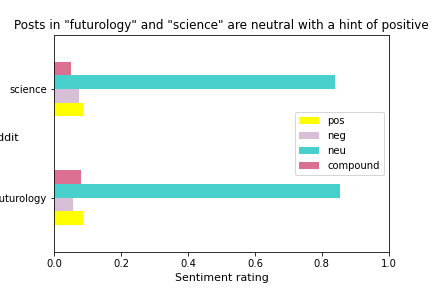
